In [1]:
import pandas as pd
from trueskill import Rating, quality_1vs1, rate_1vs1, quality, rate, global_env, choose_backend,  backends, setup
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
from IPython.display import display
from ipywidgets import widgets
display(HTML("<style>.container { width:90% !important; }</style>"))

sort_order = ['date', 'compID', 'position', 'result']

## Initialize values

In [2]:
spread_factor_minimized = [1.1, .9, .5, .3, .05]

## Get 2017 Ratings and get starting 2018 ratings for returning players

In [336]:
# Load and derive 2017 Ratings
df_2017 = pd.read_csv('Data/Competition-2017.csv').drop_duplicates()
df_2017.columns = ['division', 'compID', 'location', 'date', 'college', 'first_name', 'last_name', 'position', 'result', 'score']

sort_order = ['date', 'compID', 'position', 'result']

df_2017['name'] = df_2017['first_name'].apply(lambda x: x.strip()) + " " + df_2017['last_name'].apply(lambda x: x.strip())
pid = {}
plist = df_2017['name'].unique()
for i in range(len(plist)):
    pid[plist[i]] = i
    
df_2017['playerid'] = df_2017['name'].apply(lambda x: pid[x])
df_2017 = df_2017[['division', 'compID', 'location', 'date', 'college', 'first_name',
       'last_name', 'playerid', 'position', 'result', 'score']]

df_2017

division  compID                         location        date  \
0          DII     722                       Irvine, Ca  2017-02-01   
1          DII     722                       Irvine, Ca  2017-02-01   
2          DII     722                       Irvine, Ca  2017-02-01   
3          DII     722                       Irvine, Ca  2017-02-01   
4          DII     722                       Irvine, Ca  2017-02-01   
5          DII     722                       Irvine, Ca  2017-02-01   
6          DII     722                       Irvine, Ca  2017-02-01   
7          DII     722                       Irvine, Ca  2017-02-01   
8          DII     722                       Irvine, Ca  2017-02-01   
9          DII     722                       Irvine, Ca  2017-02-01   
10         DII     722                       Irvine, Ca  2017-02-01   
11         DII     722                       Irvine, Ca  2017-02-01   
12         DII     722                       Irvine, Ca  2017-02-01   
13         DII     722                       Irvine, Ca  2017-02-01   
14         DII     722                       Irvine, Ca  2017-02-01   
15         DII     722                       Irvine, Ca  2017-02-01   
16         DII     722                       Irvine, Ca  2017-02-01   
17         DII     722                       Irvine, Ca  2017-02-01   
18         DII     722                       Irvine, Ca  2017-02-01   
19         DII     722                       Irvine, Ca  2017-02-01   
20        NAIA     788                  Babson Park, Fl  2017-02-23   
21        NAIA     788                  Babson Park, Fl  2017-02-23   
22        NAIA     788                  Babson Park, Fl  2017-02-23   
23        NAIA     788                  Babson Park, Fl  2017-02-23   
24        NAIA     788                  Babson Park, Fl  2017-02-23   
25        NAIA     788                  Babson Park, Fl  2017-02-23   
26        NAIA     788                  Babson Park, Fl  2017-02-23   
27        NAIA     788                  Babson Park, Fl  2017-02-23   
28        NAIA     788                  Babson Park, Fl  2017-02-23   
29        NAIA     788                  Babson Park, Fl  2017-02-23   
...        ...     ...                              ...         ...   
15616       DI     718    NCAA Championship Semifinal    2017-05-07   
15617       DI     718    NCAA Championship Semifinal    2017-05-07   
15618       DI     718    NCAA Championship Semifinal    2017-05-07   
15619       DI     718    NCAA Championship Semifinal    2017-05-07   
15620       DI     718    NCAA Championship Semifinal    2017-05-07   
15621       DI     718    NCAA Championship Semifinal    2017-05-07   
15622       DI     718    NCAA Championship Semifinal    2017-05-07   
15623       DI     718    NCAA Championship Semifinal    2017-05-07   
15624       DI     718    NCAA Championship Semifinal    2017-05-07   
15625       DI     718    NCAA Championship Semifinal    2017-05-07   
15626       DI     719         NCAA Championship Final   2017-05-07   
15627       DI     719         NCAA Championship Final   2017-05-07   
15628       DI     719         NCAA Championship Final   2017-05-07   
15629       DI     719         NCAA Championship Final   2017-05-07   
15630       DI     719         NCAA Championship Final   2017-05-07   
15631       DI     719         NCAA Championship Final   2017-05-07   
15632       DI     719         NCAA Championship Final   2017-05-07   
15633       DI     719         NCAA Championship Final   2017-05-07   
15634       DI     719         NCAA Championship Final   2017-05-07   
15635       DI     719         NCAA Championship Final   2017-05-07   
15636       DI     719         NCAA Championship Final   2017-05-07   
15637       DI     719         NCAA Championship Final   2017-05-07   
15638       DI     719         NCAA Championship Final   2017-05-07   
15639       DI     719         NCAA Championship Final   2017-05-07   
15640       DI     719        

In [337]:
def get_teams_by_division(df_, div_='DI'):
    df_ = df_[df_['division'] == div_].drop_duplicates() \
        .reset_index().iloc[:,1:] \
        .sort_values(sort_order, ascending=True)
    return df_

d_2017 = create_ratings_from_matches(df_2017, spread_factor_minimized)
d_2017

{'matches':       division  compID                             location       date  \
 0           DI     799                           Deland, FL 2018-02-23   
 1           DI     799                           Deland, FL 2018-02-23   
 2           DI     799                           Deland, FL 2018-02-23   
 3           DI     799                           Deland, FL 2018-02-23   
 4           DI     799                           Deland, FL 2018-02-23   
 5           DI     799                           Deland, FL 2018-02-23   
 6           DI     799                           Deland, FL 2018-02-23   
 7           DI     799                           Deland, FL 2018-02-23   
 8           DI     799                           Deland, FL 2018-02-23   
 9           DI     799                           Deland, FL 2018-02-23   
 10          DI     800                           Deland, FL 2018-02-23   
 11          DI     800                           Deland, FL 2018-02-23   
 12          D

In [343]:
df_player_info_2017 = get_player_info(df_2017)
#df_player_info_2017[df_player_info_2017['name'] == 'Sara Hughes']

In [352]:
# List 2017 top players
df_top_players_2017 = get_top_players(d_2017['match_history'], position_='all')
#df_top_players_2017
#df_top_players_2017.head(100).to_csv('2017_110_090_050_030_005/top_players.csv')

df_top_players_2017.merge(df_player_info_2017, left_on='playerid', right_index=True) #.sort_values('mu', ascending=False)
#plot_rating_distribution(d_2017['match_history'], save_path_=None)

rank  playerid                   college division     rating  \
0       1       317                       USC       DI  81.946940   
1       2       316                       USC       DI  81.946940   
2       3       826                Washington       DI  72.393152   
3       4       330             Florida State       DI  71.884347   
4       5        42                      UCLA       DI  70.930247   
5       6       333             Florida State       DI  70.886090   
6       7        43                      UCLA       DI  70.831588   
7       8        71                       FIU       DI  70.369666   
8       9       307                Pepperdine       DI  69.045086   
9      10       306                Pepperdine       DI  69.045086   
10     11       329             Florida State       DI  68.675631   
11     12       195                       LMU       DI  66.093442   
12     13       215                       LMU       DI  66.063748   
13     14       309                Pepperdine       DI  65.459108   
14     15       308                Pepperdine       DI  65.459108   
15     16       417            South Carolina       DI  65.017262   
16     17       163                    Hawaii       DI  64.433662   
17     18       162                    Hawaii       DI  64.433662   
18     19       827                Washington       DI  64.132286   
19     20       382              Saint Mary's       DI  64.030553   
20     21       383              Saint Mary's       DI  64.030553   
21     22       318                       USC       DI  63.698535   
22     23       335                       LSU       DI  63.624767   
23     24       336                       LSU       DI  63.624767   
24     25        63              Cal Poly SLO       DI  62.925948   
25     26        60              Cal Poly SLO       DI  62.615039   
26     27        61              Cal Poly SLO       DI  62.615039   
27     28        82                       FAU       DI  62.443617   
28     29       164                    Hawaii       DI  62.201405   
29     30       319                       USC       DI  61.299553   
..    ...       ...                       ...      ...        ...   
648   649       872            South Carolina       DI  18.180252   
649   650       107                New Mexico       DI  18.172002   
650   651       654                      Utah       DI  18.062622   
651   652       594  Texas A&M Corpus Christi       DI  17.872473   
652   653       761                 UT Martin       DI  17.678674   
653   654       772     Cal State Bakersfield       DI  17.450118   
654   655        56     Cal State Bakersfield       DI  17.391667   
655   656       259                    Mercer       DI  17.304900   
656   657       327                       ASU       DI  17.144008   
657   658       785          Coastal Carolina       DI  17.014823   
658   659       806  Texas A&M Corpus Christi       DI  16.854745   
659   660       529                       USF       DI  16.714980   
660   661       528                       USF       DI  16.714980   
661   662        57     Cal State Bakersfield       DI  16.687472   
662   663       807  Texas A&M Corpus Christi       DI  16.280541   
663   664       732            Morehead State       DI  16.209893   
664   665       247        Jacksonville State       DI  15.996747   
665   666       590  Texas A&M Corpus Christi       DI  15.825149   
666   667       294              Jacksonville       DI  15.332888   
667   668        52     Cal State Bakersfield       DI  15.207085   
668   669       730            Morehead State       DI  15.160997   
669   670       412               Santa Clara       DI  14.604341   
670   671       236        Jacksonville State       DI  13.924342   
671   672       765                 UT Martin       DI  13.262971   
672   673       731            Morehead State       DI  12.930063   
673   674       766                 UT Martin       DI  12.673822   
674

In [371]:
def get_prior_year_player_rating_adders(df_top_players_):
    #2 standard deviations from the mean - best performers
    two_sigma = 2*df_top_players_.rating.std() + df_top_players_.rating.mean()
    high_perfomers = df_top_players_[df_top_players_['rating'] > two_sigma][['playerid']]
    high_perfomers['adder'] = 2

    #3 standard deviations from the mean - over-performing outliers
    three_sigma = 3*df_top_players_.rating.std() + df_top_players_.rating.mean()
    ultra_high_perfomers = df_top_players_[df_top_players_['rating'] > three_sigma][['playerid']]
    ultra_high_perfomers['adder'] = 1

    adder = pd.concat([high_perfomers, ultra_high_perfomers])
    adder = adder.groupby(['playerid'])['adder'].sum().to_frame().sort_values(['adder'], ascending=False)
    adder_dict =  adder.to_dict()['adder']
    return adder_dict


def create_start_rating(_adder_dict, _df_top_players):
    df_adder= pd.DataFrame.from_dict(_adder_dict, orient='index', columns=['adder']).reset_index()
    df_adder.columns = ['playerid', 'adder']
    df_starting_rating = pd.merge(_df_top_players, df_adder, how='outer')
    df_starting_rating['adder'] = df_starting_rating['adder'].fillna(0)
    df_starting_rating['start_rating'] = df_starting_rating['adder']+25
    df_starting_rating.columns = ['rank', 'playerid', 'college', 'division', 'last_season_end_rating',
       'primary position', 'date', 'adder', 'new_season_start_rating']
    return df_starting_rating[['playerid', 'last_season_end_rating','new_season_start_rating']]


# Add points to players above standard deviation from mean
dict_adder_from_2017 = get_prior_year_player_rating_adders(df_top_players_2017)
df_start_rating_2018 = create_start_rating(dict_adder_from_2017, df_top_players_2017) \
                        .merge(df_player_info_2017, left_on='playerid', right_index=True) 
                        
df_start_rating_2018.to_csv('2017_110_090_050_030_005/top_players_next_year_starting_rating.csv') 
df_start_rating_2018
#dict_start_ratings = df_start_rating_2018[['playerid','name','new_season_start_rating' ]].set_index('playerid').to_dict(orient='dict')['new_season_start_rating']


playerid  last_season_end_rating  new_season_start_rating first_name  \
0         317               81.946940                     28.0       Sara   
1         316               81.946940                     28.0      Kelly   
2         826               72.393152                     27.0     Crissy   
3         330               71.884347                     27.0      Leigh   
4          42               70.930247                     27.0     Nicole   
5         333               70.886090                     27.0    Vanessa   
6          43               70.831588                     27.0      Megan   
7          71               70.369666                     27.0   Federica   
8         307               69.045086                     27.0    Madalyn   
9         306               69.045086                     27.0    Delaney   
10        329               68.675631                     27.0     Brooke   
11        195               66.093442                     27.0   Savannah   
12        215               66.063748                     27.0      Sarah   
13        309               65.459108                     27.0    Corinne   
14        308               65.459108                     27.0   Brittany   
15        417               65.017262                     27.0   Adrianna   
16        163               64.433662                     27.0    Mikayla   
17        162               64.433662                     27.0     Morgan   
18        827               64.132286                     27.0        Tia   
19        382               64.030553                     27.0     Payton   
20        383               64.030553                     27.0    Lindsey   
21        318               63.698535                     27.0      Allie   
22        335               63.624767                     27.0     Claire   
23        336               63.624767                     27.0    Kristen   
24         63               62.925948                     27.0      Adlee   
25         60               62.615039                     27.0      Emily   
26         61               62.615039                     27.0     Hannah   
27         82               62.443617                     27.0   Jessalyn   
28        164               62.201405                     27.0      Nikki   
29        319               61.299553                     25.0     Sophie   
..        ...                     ...                      ...        ...   
648       872               18.180252                     25.0         AJ   
649       107               18.172002                     25.0      Carly   
650       654               18.062622                     25.0   Berkeley   
651       594               17.872473                     25.0     Claire   
652       761               17.678674                     25.0    Saphyra   
653       772               17.450118                     25.0      Emily   
654        56               17.391667                     25.0       Ally   
655       259               17.304900                     25.0     Morgan   
656       327               17.144008                     25.0     Sydney   
657       785               17.014823                     25.0       Dora   
658       806               16.854745                     25.0      Naomi   
659       529               16.714980                     25.0    Shannon   
660       528               16.714980                     25.0       Kate   
661        57               16.687472                     25.0      Kayla   
662       807               16.280541                     25.0     Morgan   
663       732               16.209893                     25.0     Maddie   
664       247               15.996747                     25.0     Rachel   
665       590               15.825149                     25.0    Kristyn   
666       294               15.332888                     25.0       Tori   
667        52               15.207085                     25.0     Hannah   
6

## Plot Rating distributions for 2017

playerid       date  compID                                   location  \
0         317 2017-05-07     719                    NCAA Championship Final   
1         316 2017-05-07     719                    NCAA Championship Final   
2         826 2017-04-28     495         Pac-12 Championships at Tuscon, Az   
3          42 2017-05-06     714                         NCAA Championships   
4          71 2017-04-23     353  CCSA Conference Championship- Emerson, Ga   
5         307 2017-05-07     718                NCAA Championship Semifinal   
6         306 2017-05-07     718                NCAA Championship Semifinal   
7         329 2017-05-06     714                         NCAA Championships   
8         163 2017-05-07     718                NCAA Championship Semifinal   
9         417 2017-05-05     705                         NCAA Championships   
10        308 2017-05-07     718                NCAA Championship Semifinal   
11        318 2017-05-07     719                    NCAA Championship Final   
12         82 2017-04-22     329  CCSA Conference Championship- Emerson, Ga   
13        164 2017-05-07     718                NCAA Championship Semifinal   
14        195 2017-04-22     331         WCC Championship- Santa Monica, Ca   
15        335 2017-05-05     707                         NCAA Championships   
16         61 2017-04-29     514    Big West Championships- Pismo Beach, Ca   
17        143 2017-04-28     495         Pac-12 Championships at Tuscon, Az   
18         80 2017-04-23     353  CCSA Conference Championship- Emerson, Ga   
19        363 2017-05-05     710                         NCAA Championships   
20        437 2017-04-22     326  CCSA Conference Championship- Emerson, Ga   
21        351 2017-04-23     357   ASUN Conference Championship- Deland, Fl   
22        438 2017-04-22     326  CCSA Conference Championship- Emerson, Ga   
23        352 2017-04-23     357   ASUN Conference Championship- Deland, Fl   
24        353 2017-04-23     357   ASUN Conference Championship- Deland, Fl   
25        482 2017-04-29     518                            New Orleans, La   
26         46 2017-05-06     714                         NCAA Championships   
27        483 2017-04-29     517                            New Orleans, La   
28         47 2017-05-06     714                         NCAA Championships   
29        178 2017-04-27     468         Pac-12 Championships at Tuscon, Az   
..        ...        ...     ...                                        ...   
323       728 2017-04-08     248             Nashville Beach at Joelton, TN   
324       436 2017-03-25     484        Gamecock Grand Slam- Columbia, S.C.   
325       757 2017-04-21     313                                Conway, Ark   
326       758 2017-04-21     313                                Conway, Ark   
327       160 2017-04-22     348   ASUN Conference Championship- Deland, Fl   
328       729 2017-04-08     248             Nashville Beach at Joelton, TN   
329       821 2017-04-14     137                               Conway, S.C.   
330       708 2017-04-15     138                               Conway, S.C.   
331       644 2017-04-23     358                                Seattle, Wa   
332       707 2017-04-15     138                               Conway, S.C.   
333       645 2017-04-27     458         Pac-12 Championships at Tuscon, Az   
334       170 2017-03-04     361         Arizona Invitational at Tuscon, Az   
335       124 2017-04-21     338         WCC Championship- Santa Monica, Ca   
336       261 2017-04-29     519                            New Orleans, La   
337       870 2017-04-27     456         Pac-12 Championships at Tuscon, Az   
338       260 2017-04-01     169      Surf and Turf Invitational- Miami, Fl   
339        48 2017-04-01      76       Wildcat Spring Challenge- Tucson, Az   
340       512 2017-04-21     339         WCC Championship- Santa Monica, Ca   
341       107 2017-04-21     299                       

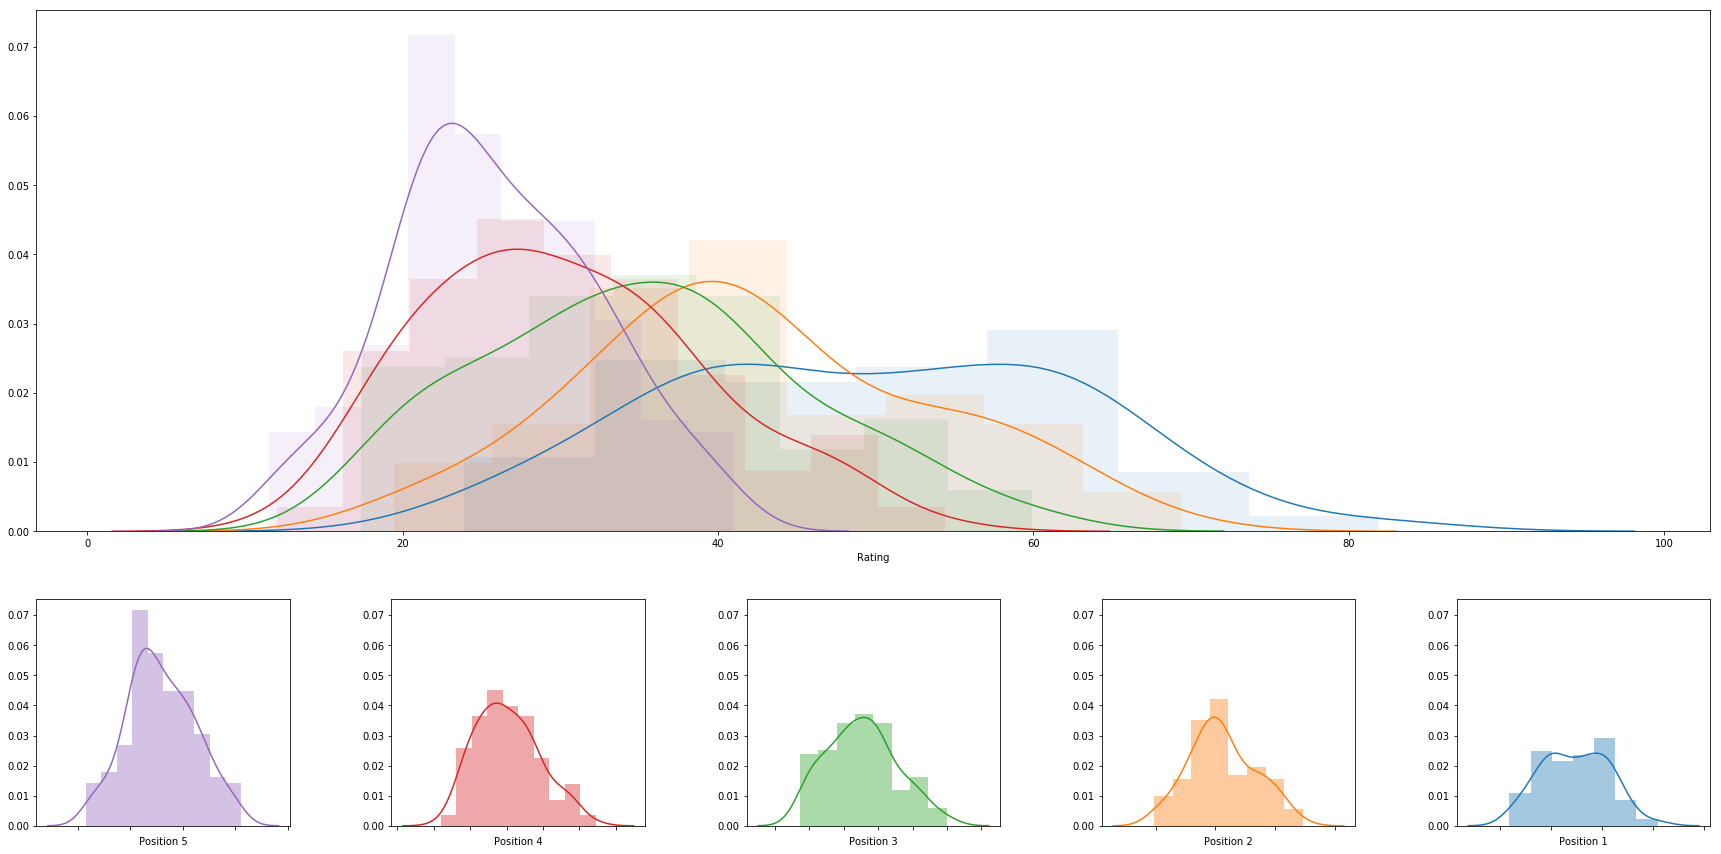

In [372]:
plot_rating_distribution(d_2017['match_history'],'2017_110_090_050_030_005/rating_distribution.pdf')

## Process 2018 data

In [373]:
df_2018 = pd.read_csv('Data/Competition-2018.csv').drop_duplicates()
df_2018.columns = ['division', 'compID', 'location', 'date', 'college', 'first_name', 'last_name', 'playerid','position', 'result', 'score']
sort_order = ['date', 'compID', 'position', 'result']

In [374]:
#UTILITIES
def strip_all_strings_in_df(df_, cols_):
    for s in cols_:
        df_[s] = df_[s].apply(lambda x: x.strip())
    return df_

#GET TEAM INFO
def get_teams_by_division(df_, div_='DI'):
    df_ = df_[df_["division"] == div_].drop_duplicates() \
        .reset_index().iloc[:,1:] \
        .sort_values(sort_order, ascending=True)
    return df_

#LOAD DATA
def get_competition_info(df_, div_='DI'):
    df_ = get_teams_by_division(df_, div_)
    df_ = strip_all_strings_in_df(df_, ['first_name', 'last_name', 'college', 'location', 'division'])
    df_['date'] = pd.to_datetime(df_['date'], errors = 'coerce')

    df_ = df_.groupby('compID') \
        .filter(lambda x: len(x) > 8 ) \
        .sort_values(['date', 'compID', 'position', 'result'], ascending=True) \
        .reset_index() \
        .iloc[:,1:]
    return df_

df_matches = get_competition_info(df_2018, 'DI')

In [207]:
#GET PLAYER INFO
def get_player_info(df_):
    df_ = df_[['playerid', 'first_name', 'last_name']].drop_duplicates()
    df_ = strip_all_strings_in_df(df_, ['first_name', 'last_name']) 
    df_['name'] = df_['first_name'] + " "  + df_['last_name']
    return df_.sort_values('playerid').set_index('playerid')

df_player_info = get_player_info(df_2018)
df_player_info

first_name   last_name                 name
playerid                                            
1             Megan    McNamara       Megan McNamara
2            Nicole    McNamara      Nicole McNamara
4              Madi     Yeomans         Madi Yeomans
5             Elise      Zappia         Elise Zappia
6            Torrey  Van Winden    Torrey Van Winden
7            Jordan    Anderson      Jordan Anderson
8              Izzy       Carey           Izzy Carey
9              Lily     Justine         Lily Justine
10           Chanti     Holroyd       Chanti Holroyd
12           Brooke     Kuhlman       Brooke Kuhlman
13          Vanessa      Freire       Vanessa Freire
14        Francesca   Goncalves  Francesca Goncalves
15             Macy      Jerger          Macy Jerger
16         Victoria   Paranagua   Victoria Paranagua
17            Katie      Horton         Katie Horton
18            Molly      McBain         Molly McBain
19              Eva   Torruella        Eva Torruella
20            Nikki    Esposito       Nikki Esposito
26           Terese      Cannon        Terese Cannon
28            Abril  Bustamante     Abril Bustamante
29              Joy      Dennis           Joy Dennis
30            Jenna      Belton         Jenna Belton
31               Jo      Kremer            Jo Kremer
32           Briana      Correa        Briana Correa
33           Kaylie      Mchugh        Kaylie Mchugh
34            Tarin    Mergener       Tarin Mergener
35         Madeline       Mertz       Madeline Mertz
37              Lan      Nguyen           Lan Nguyen
41             Anna        Chin            Anna Chin
42        Christina      Mcafee     Christina Mcafee
...             ...         ...                  ...
2100          Nicki    Ezatagha       Nicki Ezatagha
2101         Sydney       Means         Sydney Means
2102          Carly      Morlan         Carly Morlan
2103         Nicole     Mattson       Nicole Mattson
2104          Gabbi       Fresh          Gabbi Fresh
2105      Elizabeth    Charlton   Elizabeth Charlton
2106           Teja       Evans           Teja Evans
2107       Samantha    Drechsel    Samantha Drechsel
2108         Jaclyn       Brown         Jaclyn Brown
2109           Sara      Boothe          Sara Boothe
2110           Sara    Watanabe        Sara Watanabe
2111        Melissa      Powell       Melissa Powell
2112          Ryann    Thomison       Ryann Thomison
2113        Forfeit           1            Forfeit 1
2114        Forfeit           2            Forfeit 2
2115         Rachel       Moore         Rachel Moore
2116         Kelsey      Larsen        Kelsey Larsen
2117          Amber         Lao            Amber Lao
2118            Mel       Baron            Mel Baron
2119            Kim  Krutsinger       Kim Krutsinger
2120          Raven     Anthony        Raven Anthony
2121        Forfeit           1            Forfeit 1
2122        Forfeit           2            Forfeit 2
2123          Kelly     Markham        Kelly Markham
2124          Diana     Patrick        Diana Patrick
2125          Erika        Eide           Erika Eide
2217        Forfeit           1            Forfeit 1
2218        Forfeit           2            Forfeit 2
2219        Forfeit           1            Forfeit 1
2220        Forfeit           2            Forfeit 2

[1364 rows x 3 columns]

In [400]:
start_ratings = df_player_info.merge(df_start_rating_2018, how='left', on='name') \
                .dropna() \
                .sort_values('new_season_start_rating', ascending=False)
start_ratings = start_ratings[['new_season_start_rating','name']].set_index('name') #.to_dict(orient='dict')['new_season_start_rating']

dict_start_ratings = start_ratings.merge(df_player_info, how='left', left_index=True, right_on='name') \
                    .reset_index() \
                    .set_index('playerid')
dict_start_ratings = dict_start_ratings.to_dict()['new_season_start_rating']


In [401]:
def set_default_player_rating(df_, dict_start_rating_ = None):
    df_players_ = get_player_info(df_)
    df_players_.loc[:,'mu'] = Rating().mu
    df_players_['sigma'] = Rating().sigma

    if dict_start_rating_ != None:
        df_start_rating_ = pd.DataFrame.from_dict(dict_start_rating_, orient='index')
        df_players_ = df_players_.join(df_start_rating_)
        df_players_.columns = ['first_name', 'last_name', 'name', 'mu', 'sigma', 'rating']
        df_players_['mu'] = df_players_['rating'].where(df_players_['rating'].isin([25,26,27,28,29])).fillna(25)

    return df_players_[['first_name', 'last_name', 'name', 'mu', 'sigma']]


df_players = set_default_player_rating(df_2018, dict_start_ratings)
df_players.head(10)

first_name   last_name               name    mu     sigma
playerid                                                          
1             Megan    McNamara     Megan McNamara  27.0  8.333333
2            Nicole    McNamara    Nicole McNamara  27.0  8.333333
4              Madi     Yeomans       Madi Yeomans  25.0  8.333333
5             Elise      Zappia       Elise Zappia  25.0  8.333333
6            Torrey  Van Winden  Torrey Van Winden  25.0  8.333333
7            Jordan    Anderson    Jordan Anderson  25.0  8.333333
8              Izzy       Carey         Izzy Carey  25.0  8.333333
9              Lily     Justine       Lily Justine  25.0  8.333333
10           Chanti     Holroyd     Chanti Holroyd  25.0  8.333333
12           Brooke     Kuhlman     Brooke Kuhlman  27.0  8.333333

In [ ]:
def get_player_ratings_from_match(df_, playerid_):
    player_idx = df_[df_.playerid == playerid_][['playerid', 'mu', 'sigma']]
    my_rating = Rating(mu=player_idx['mu'].item(), sigma=player_idx['sigma'].item()) 
    return my_rating

def get_match_player_position_info(df_, compID_):
    playerid = df_.iloc[compID_, df_.columns.get_loc('playerid')]
    position = df_.iloc[compID_, df_.columns.get_loc('position')]
    match_info = {'playerid':playerid, 'position': position, 'compID': compID_}
    return match_info

def create_ratings_from_matches(df_, k_factor_=[0,0,0,0,0], div_='DI', dict_start_rating_ = None):
    sort_order = ['date', 'compID', 'position', 'result']
    df_matches_ = get_competition_info(df_, div_)
    df_players_ = set_default_player_rating(df_matches_, dict_start_rating_).reset_index()

    groups = df_matches_.groupby(['date', 'compID', 'position']).groups
    counter = 0
    hist_dict = {}

    for key in groups.keys():
        date, compID, position = list(key)
        idx_list = groups[key]
        r = {}
        r_new = {}

        if len(idx_list) == 4:
            for i in range(len(idx_list)):
                match_info = get_match_player_position_info(df_matches_, idx_list[i])
                r[i] = get_player_ratings_from_match(df_players_, match_info['playerid'])

            t1 = [r[0], r[1]]
            t2 = [r[2], r[3]]

            ((r_new[0], r_new[1]), (r_new[2], r_new[3])) = rate([t1,t2], ranks=[1,0])

            new_rating = [((k_factor_[position-1] +r_new[i].mu), r_new[i].sigma) for i in range(4)]

            for m in range(4):
                match_info = get_match_player_position_info(df_matches_, idx_list[m])
                mu, sigma = new_rating[m]
                df_players_.loc[df_players_['playerid'] == match_info['playerid'], 'mu'] = mu
                df_players_.loc[df_players_['playerid'] == match_info['playerid'], 'sigma'] = sigma
                #print(df_players_[df_players_['playerid'] == match_info['playerid']])

            hist_dict[counter] = df_matches_.iloc[idx_list].merge(df_players_, \
                                                              left_on=['playerid'],
                                                              right_on=['playerid'],
                                                              how='inner')
            counter += 1

    df_match_history = pd.concat(hist_dict.values(), axis=0) \
                        .sort_values(['date','compID'], ascending=True) \
                        .reset_index() \
                        .iloc[:,1:] \
                        .rename(columns={'division_y': 'division'})

    df_match_history = set_primary_position(df_match_history)

    d = {'matches': df_matches, 'match_history': df_match_history, 'players':  df_players_}
    return d

def set_primary_position(df_):
    df_['count_max'] = df_.groupby(['playerid', 'position'])['position'].transform('count')
    df_['count at primary position'] = df_.groupby(['playerid'])['count_max'].transform('max')
    idx = df_[df_['count at primary position'] == df_['count_max']]

    primary_position = idx.loc[:, ['playerid', 'position']]
    primary_position['position'] = primary_position.groupby(['playerid'])['position'].transform('min')
    primary_position = primary_position.drop_duplicates()

    temp = df_.merge(primary_position, on=['playerid'])
    temp.rename(columns = {'position_y': 'primary position', 'position_x': 'position'}, inplace=True)
    temp = temp.loc[:,['date','compID', 'location', 'playerid', \
          'position', 'primary position', 'college','division' ,'result', 'mu', 'sigma' ]]
    return temp



d_2018 = create_ratings_from_matches(df_2018, spread_factor_minimized, 'DI', dict_start_ratings)

In [233]:
def get_top_players(df_, position_='all'):
    if position_ == 'all':
        df_top_players_ = df_.sort_values(['date', 'compID'], ascending=True).copy()
    else:
        df_top_players_ = df_[df_['primary position'] == position_].sort_values(['date', 'compID'], ascending=True).copy()
    df_top_players_ = df_top_players_.groupby(['playerid', 'college', 'division']) \
                                    .last() \
                                    .sort_values('mu', ascending=False) \
                                    .reset_index()

    df_top_players_['rank'] = df_top_players_.index+1
    df_top_players_ = df_top_players_.loc[:,['rank','playerid', 'college', 'division', 'mu', 'primary position', 'date']]
    df_top_players_.columns= ['rank','playerid','college', 'division', 'rating', 'primary position' ,'date']
    return df_top_players_


!mkdir 2018_110_090_050_030_005
df_top_players_2018 = get_top_players(d_2018['match_history'], position_='all').merge(df_player_info, on='playerid')
df_top_players_2018 = df_top_players_2018[['division','rank', 'name', 'playerid', 'college',  'primary position', 'date']]
df_top_players_2018.to_csv('2018_110_090_050_030_005/top_players.csv')
df_top_players_2018

mkdir: 2018_110_090_050_030_005: File exists


division  rank                 name  playerid  \
0         DI     1     Abril Bustamante        28   
1         DI     2       Megan McNamara         1   
2         DI     3      Nicole McNamara         2   
3         DI     4        Tina Graudina      1056   
4         DI     5   Victoria Paranagua        16   
5         DI     6       Ka'iwi Schucht       754   
6         DI     7         Emily Maglio       764   
7         DI     8         Kristen Nuss       102   
8         DI     9       Claire Coppola       103   
9         DI    10        Sasha Karelov        71   
10        DI    11       Vanessa Freire        13   
11        DI    12     Sunny Villapando      1212   
12        DI    13          Nele Barber        65   
13        DI    14       Madeline Mertz        35   
14        DI    15        Kaylie Mchugh        33   
15        DI    16        Sarah Sponcil       247   
16        DI    17         Lily Justine         9   
17        DI    18         Katie Horton        17   
18        DI    19         Deahna Kraft       219   
19        DI    20      Corinne Quiggle       209   
20        DI    21          Hailey Luke       743   
21        DI    22         Sammy Slater      1053   
22        DI    23          Katie Smith       116   
23        DI    24      Federica Frasca       293   
24        DI    25  Margherita Bianchin       292   
25        DI    26        Morgan Martin       763   
26        DI    27       Jessica Wooten       393   
27        DI    28        Aeriel Horton       392   
28        DI    29        Lea Monkhouse      1071   
29        DI    30          Madalyn Roh       213   
..       ...   ...                  ...       ...   
670       DI   671         Claire Doyle       317   
671       DI   672     Trish Koutsoukos       413   
672       DI   673    Maybeth Sandercox      1402   
673       DI   674    Hayley Densberger      1294   
674       DI   675    Hannah Manzanares       429   
675       DI   676        Kellie Hughes      1318   
676       DI   677       Grace Jarnagin      1274   
677       DI   678          Lexie Rawls      1400   
678       DI   679     Brigitte Murdock       620   
679       DI   680      Makenzie Kesler      1399   
680       DI   681      Pi'ikea Clemens      1501   
681       DI   682         Lauren Rokey      1421   
682       DI   683       Brooke Boiseau      1448   
683       DI   684     Krista Hernandez      1450   
684       DI   685         Maddie Fella       684   
685       DI   686    Danielle McCarson       675   
686       DI   687      Hannah Marchand      1264   
687       DI   688         Sydney Wicks       893   
688       DI   689          Ally Barber       774   
689       DI   690         Lauren Naatz       274   
690       DI   691      McKenzie Schwan      1315   
691       DI   692       Aristea Tontai      2079   
692       DI   693           Kalin Eske      2078   
693       DI   694           Sarah Falk      1236   
694       DI   695         Jordan Jones       674   
695       DI   696     Shannon Levinson       407   
696       DI   697          Tori Reiser       471   
697       DI   698         Paris Cosley      1398   
698       DI   699       Sofia Resendiz      1405   
699       DI   700      Maddie Cloutier       511   

                              college  primary position       date  
0                                 USC                 1 2018-05-05  
1                                UCLA                 1 2018-05-06  
2                                UCLA                 1 2018-05-06  
3                                 USC                 1 2018-05-05  
4                       Florida State                 1 2018-05-05  
5                              Hawaii                 1 2018-05-06  
6                              Hawaii                 1 2018-05-06  
7                                 LSU                 1 2018-05-05  
8                                 LSU                 1 2018-05-05  
9                    Long B

In [ ]:
def get_verbose_player_info(playerid_, verbose):
    if verbose:
        print('do stuff')
    return None

def show_player_chart_history(temp_df_, showChart):
    if showChart:
        f =  plt.figure(figsize=(30, 15))
        sns.lineplot(x="date", y="mu", data=temp_df_)
    return None

def get_opponent_info(df_opp_,col_name_, first_last):
    if first_last == 'first':
        df_opp_x = df_opp_.first()
    elif first_last == 'last':
        df_opp_x = df_opp_.last()
    else:
        print('try another')
        
    df_opp_x = df_opp_x.reset_index() \
                .merge(df_player_info, how='left', left_on='playerid', right_on='playerid')
    df_opp_x[col_name_] = df_opp_x['name'] + " - " + df_opp_x['college_x'] + \
                            ' (' + df_opp_x['mu'].apply(lambda x: str(round(x,2))) + \
                            ')'
    return df_opp_x


def add_opponents_info(df_, df_summary_):
    df_opp = pd.merge(df_[['playerid', 'mu' ,'compID', 'position', 'result', 'college']], \
                      df_summary_[['compID', 'position', 'opponent_result', 'college']], \
                      left_on=['compID', 'position', 'result'], \
                      right_on=['compID', 'position', 'opponent_result']) \
                .groupby(['compID']) 
    
    df_opp1 = get_opponent_info(df_opp,'Opponent 1', 'first')
    df_summary_ = pd.merge(df_summary_,df_opp1[['compID','Opponent 1']], on='compID')
    
    df_opp2 = get_opponent_info(df_opp,'Opponent 2', 'last')
    df_summary_ = pd.merge(df_summary_,df_opp2[['compID','Opponent 2']], on='compID')
    return df_summary_
    
def add_partner_info(df_, temp_df_, playerid_):
    df_partner = pd.merge(df_[df_['playerid'] != playerid_],temp_df_, \
                      left_on=['compID', 'position', 'result'], right_on=['compID', 'position', 'result'] ) \
                .groupby(['compID']) \
                .first() \
                .reset_index() \
                .merge(df_player_info, how='left', left_on='playerid_x', right_on='playerid')
    df_partner = df_partner[['compID', 'college_y','mu_y', 'name_y', 'playerid_y' ]]
    df_partner.columns = ['compID', 'college', 'mu', 'name', 'partner_id']
    df_partner['Partner'] = df_partner['name'] + " - " + df_partner['college'] + \
                            ' (' + df_partner['mu'].apply(lambda x: str(round(x,2))) + \
                            ')'
    df_summary_ = pd.merge(temp_df_,df_partner[['compID','Partner']], on='compID')
    return df_summary_

def get_player_rating_history(df_, playerid_, verbose=False, showChart=False):
    temp_df = df_[df_['playerid'] == playerid_].merge(df_player_info, on='playerid')
    get_verbose_player_info(playerid_,verbose )
    show_player_chart_history(temp_df, showChart)

    temp_df['opponent_result'] = abs(temp_df.result - 1)

    df_summary = add_partner_info(df_, temp_df, playerid_)
    df_summary = add_opponents_info(df_, df_summary)
    
    df_summary['Name(Rating)'] = df_summary['name'] + " - " + df_summary['college'] + \
                            ' (' + df_summary['mu'].apply(lambda x: str(round(x,2))) + \
                            ')'
    
    df_summary = df_summary[['date', 'compID','Name(Rating)', 'position', \
                             'result' ,'Partner', 'Opponent 1', 'Opponent 2', \
                             'primary position',  'location','college', 'division',\
                             'playerid', 'name', 'mu']]

    return df_summary

get_player_rating_history(d_2018['match_history'], 247, False, False)

In [ ]:
plot_team_players_history(d_2018['match_history'], 'UCLA')

In [ ]:
#plot_rating_distribution(d_2018['match_history'],'2018_110_090_050_030_005/rating_distribution.pdf')

In [ ]:
d_2018['match_history'].to_csv('2018_match_history_with_ratings.csv')

In [ ]:
p = {}
for pid in df_top_players_2018.playerid.unique():
    p[pid] = get_player_rating_history(d_2018['match_history'], pid,  False, False)
df_master_player_history  = pd.concat([p[n] for n in p.keys()])
df_master_player_history.to_csv('2018_110_090_050_030_005/master_player_history.csv')

In [ ]:
df_master_player_history

In [ ]:
def plot_team_players_history(df, college):
    df_team_history = df[df.college == college].sort_values('date', ascending=True)
    playercount = len(df_team_history.playerid.unique())
    palette = sns.color_palette("husl", playercount)
    f =  plt.figure(figsize=(30, 15))
    sns.lineplot(data=df_team_history, x="date", y="mu", hue="name", \
                 style="primary position", markers=True, palette=palette,ci=None)
    return df_team_history
    
plot_team_players_history(df_master_player_history, 'Hawaii')

In [ ]:
d_2018['players']

In [ ]:
def plot_rating_distribution(df_, save_path_=None):
    d = df_ \
        .sort_values('date', ascending=True) \
        .groupby(['playerid']) \
        .last() \
        .sort_values('mu', ascending=False) \
        .reset_index()

    current_palette = sns.color_palette()

    f =  plt.figure(figsize=(30, 15))
    grid = plt.GridSpec(3, 5, wspace=.4, hspace=0.3)
    summary_ax = f.add_subplot(grid[:2, 0:])
    pos_ax = [f.add_subplot(grid[2, 4+(i*-1)], xticklabels=[], sharey=summary_ax) for i in range(5)]
    [sns.distplot( d[d['primary position'] == i+1]['mu'], ax=summary_ax,  color=current_palette[i], axlabel='Rating', hist_kws=dict(alpha=.1)) for i in range(5)]
    [sns.distplot( d[d['primary position'] == i+1]['mu'], ax=pos_ax[i], color=current_palette[i], axlabel='Position '+str(i+1))  for i in range(5)]

    if save_path_ != None:
        f.savefig(save_path_)

    return d.merge(df_player_info, on='playerid')

def plot_top_player_rating_distribution(df_, save_path_=None):
    f =  plt.figure(figsize=(20, 7))
    sns.distplot( df_['rating'], hist_kws=dict(alpha=.1))
    #sns.lineplot( df_['rating'])
    print(df_['rating'].mean(), df_['rating'].std())
    pyplot.axvline(x=df_['rating'].mean())
    pyplot.axvline(x=df_['rating'].mean()+ df_['rating'].std(), linestyle='-.')
    pyplot.axvline(x=df_['rating'].mean()- df_['rating'].std(), linestyle='-.')
    pyplot.axvline(x=df_['rating'].mean()+ 2*df_['rating'].std(), linestyle='--')
    pyplot.axvline(x=df_['rating'].mean()- 2*df_['rating'].std(), linestyle='--')
    pyplot.axvline(x=df_['rating'].mean()+ 3*df_['rating'].std(), linestyle=':')

    if save_path_ != None:
        f.savefig(save_path_)
    return None


plot_rating_distribution(d_2018['match_history'], save_path_=None)

In [ ]:


#SETTING RATINGS





#GETTING RATINGS






# TRACK RATINGS
#Get player info



def get_player_rating(df, a):
    temp_df = df[df['playerid'] == a]
    r = Rating(temp_df.groupby(['mu'])['date'].last().sort_values(ascending=False).index[0], temp_df.groupby(['sigma'])['date'].last().sort_values(ascending=False).index[0])
    return r




